# **Loading the data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from datetime import datetime
import seaborn as sns
%matplotlib inline

import io

In [2]:
# Load the data
local_file = files.upload()
train_data = io.BytesIO(local_file['train1.csv'])
train_data2 = io.BytesIO(local_file['train.csv'])
df1 = pd.read_csv(train_data)
df2 = pd.read_csv(train_data2)



Saving train.csv to train.csv
Saving train1.csv to train1.csv


# **Data integration**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Creating one dataframe out of the two dataframes from the csv files.

In [5]:
frames = [df1, df2]

In [6]:
df = pd.concat(frames)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# **Data analysis:**



Checking the dimension of the dataset and the features.





In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000



Here we can see the shape of our data with the ``` .shape ```. Here we see (981, 13) this means that we have  a 981 rows and 13 columns

In [9]:
df.shape

(981, 13)

Here we can see the shape of our test data with the .shape. Here we see (367, 12) this means that we have a 367 rows and 12 columns

To view what data that is stored we can use .columns. This will return the colums of our data


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

To look at the data we'll use the .head() method from pandas. This will show us the first 5 items in our dataframe.

In [11]:
#First 5 rows of our dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [12]:
#Last 5 rows of our dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


>It can be seen that there are features that are numeric and also objects. Later, the ones that are not numeric will have to be converted into either float or int in order to be plotted and then used for the trainig of the models. There are also missing values in the dataset, which will be handled later.

In [14]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0].style.background_gradient(cmap='Reds')
miss_val

,MissvalCount,Percent
Loan_Status,367,37.41
Credit_History,79,8.05
Self_Employed,55,5.61
LoanAmount,27,2.75
Dependents,25,2.55
Gender,24,2.45
Loan_Amount_Term,20,2.04
Married,3,0.31


>The light red color shows the small amount of NaN values. If the features were with a high than 50% of missing values, they would have to be removed. Yet, in this case, they have relatively low percentage so they can be used in future. Then, the NaN values will be replaced.

Sorting the data by `Loan_Status`and showing 50 elements.

In [15]:
df.sort_values('Loan_Status', ascending = True)[:50]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
489,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
191,LP001656,Male,No,0,Graduate,No,12000,0.0,164.0,360.0,1.0,Semiurban,N
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,N


Sorting the data by `Education` and showing 50 elements.

In [16]:
df.sort_values('Education')[:50]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
234,LP001778,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
237,LP001788,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban,Y
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
240,LP001798,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y


Here we can see one row (one person)

In [17]:
df.iloc[0]

Loan_ID              LP001015
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5720
CoapplicantIncome           0
LoanAmount                110
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status               NaN
Name: 0, dtype: object

Get the unique values and their frequency of variable.
(Checking how many times the certain value occurs.)

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
df['ApplicantIncome'].value_counts()

2500     13
5000     11
3333     10
3500      9
2600      8
         ..
5391      1
15000     1
14999     1
7830      1
1811      1
Name: ApplicantIncome, Length: 752, dtype: int64

In [20]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [21]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [22]:
df['CoapplicantIncome'].value_counts()

0.0       429
2500.0      6
1666.0      5
2000.0      5
2083.0      5
         ... 
6250.0      1
1742.0      1
189.0       1
1868.0      1
4266.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [23]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [24]:
df['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [25]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [26]:
df['Loan_Status'].unique()

array([nan, 'Y', 'N'], dtype=object)

In [27]:
df['ApplicantIncome'].unique()

array([ 5720,  3076,  5000,  2340,  3276,  2165,  2226,  3881, 13633,
        2400,  3091,  2185,  4166, 12173,  4666,  5667,  4583,  3786,
        9226,  1300,  1888,  2083,  3909,  3765,  5400,     0,  4363,
        7500,  3772,  2942,  2478,  6250,  3268,  2783,  2740,  3150,
        7350,  2267,  5833,  3643,  5629,  3644,  1750,  6500,  3666,
        4260,  4163,  2356,  6792,  8000,  2419,  3500,  4116,  5293,
        2750,  4402,  3613,  2779,  4720,  2415,  7016,  4968,  2101,
        4490,  2917,  4700,  3445,  7666,  2458,  3250,  4463,  4083,
        3900,  4750,  3583,  3189,  6356,  3413,  7950,  3829, 72529,
        4136,  8449,  4456,  4635,  3571,  3066,  3235,  5058,  3188,
       13518,  4364,  4766,  4609,  6260,  3333,  9719,  6835,  4452,
        2262,  3901,  2687,  2243,  3417,  1596,  4513,  4500,  4523,
        4742,  4082,  2922,  4167,  4243,  1516,  1762,   724,  3125,
        2333,  3350,  2500, 12500,  4667,  3073,  3321,  3391,  3343,
        3620,  4000,

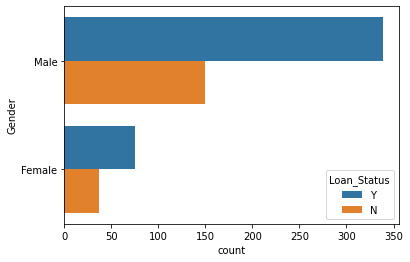

In [28]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df)

>The diagram shows on one hand that there are more male applicants than female and on other hand, there are more approved loans than disapproved.

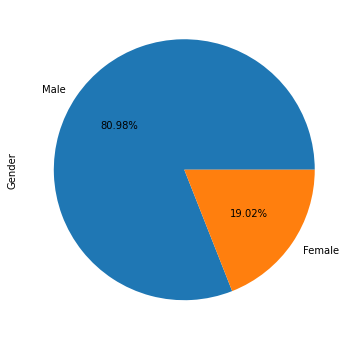

In [29]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(6, 6))

>The percentage of males who applied for a loan is greater than the one of females.

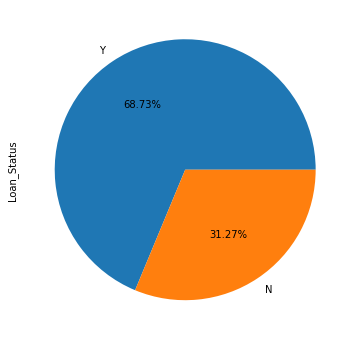

In [30]:
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(6, 6))

> According to the pie chart, there are more approved loans that
disapproved.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


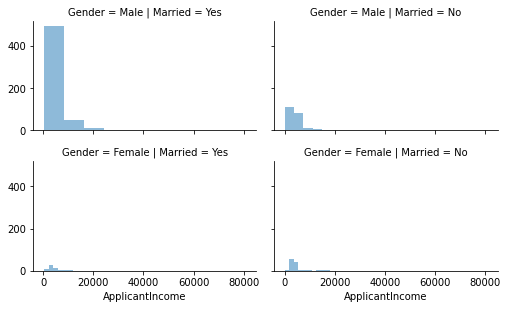

In [31]:
grid=sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

> Males have the highest income according to the data. Males that are married have greater income than unmarried male. And the same goes for females.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


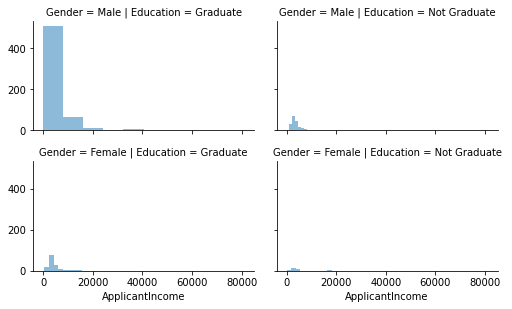

In [32]:
grid=sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

> A graduate who is a male has more income than a one whithout and the same goes for females.

Here I am exploring the distribution of the numerical variables mainly the Applicant income and the Loan amount. 

What can be noticed are quite a few outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


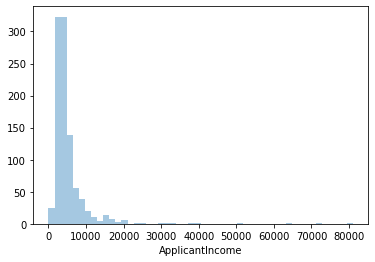

In [33]:
sns.distplot(df.ApplicantIncome,kde=False)

>People with better education should normally have a higher income, we can
check that by plotting the education level against the income.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


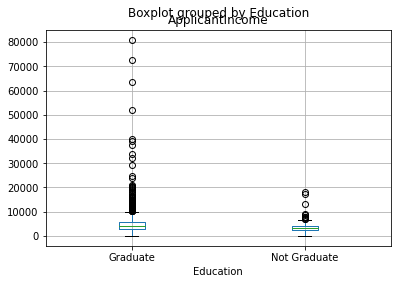

In [34]:
df.boxplot(column='ApplicantIncome', by = 'Education')



> We can conclude that there is no substantial different between the mean income of graduate and non-graduates. However, there are a higher number of graduates with very high incomes, which are appearing to be the outliers.


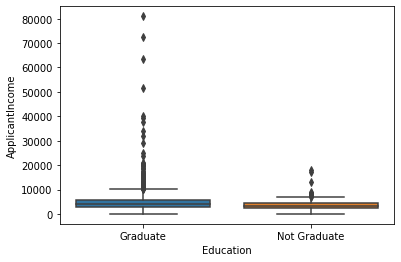

In [35]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

>The distributions shows that the graduates have more outliers which means that the people with huge income are most likely to be educated.

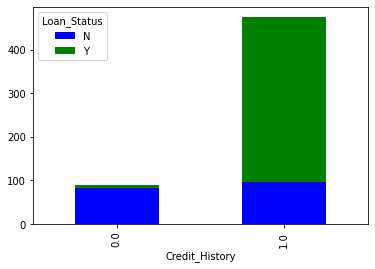

In [36]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['blue','green'], grid=False)

>This shows that the chances of getting a loan are higher if the applicant has a valid credit history.

# **Data cleaning**

Checking if there are any null values and if so, which.

In [37]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

Converting the string values to numeric valuesto use them in the training of the models.

One-Hot Encoding: 
This process takes categorical variables and converts them to a numerical representation without an arbitrary ordering. What computers know is numbers and for machine learning it is vital to accommodate the feautures into numeric values. 

In [38]:
numeric_gender = {'Female': 1, 'Male': 2}
df ['Gender'] = df['Gender'].map(numeric_gender)
numeric_married = {'Yes': 1, 'No': 2}
df ['Married'] = df['Married'].map(numeric_married)
numeric_edu = {'Graduate': 1, 'Not Graduate': 2}
df ['Education'] = df['Education'].map(numeric_edu)
numeric_self = {'Yes': 1, 'No': 2}
df ['Self_Employed'] = df['Self_Employed'].map(numeric_self)
numeric_loan = {'Y': 1, 'N': 2}
df ['Loan_Status'] = df['Loan_Status'].map(numeric_loan)
numeric_property = {'Rural': 1, 'Urban': 2, 'Semiurban': 3}
df ['Property_Area'] = df['Property_Area'].map(numeric_property)
numeric_d = {'3+': 3}
df ['Dependents'] = df['Dependents'].map(numeric_d)

Filling up the null values in order to train the model. 

In [41]:
df.fillna(0)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001015,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001022,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001031,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001035,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,...,Loan_ID_LP002920,Loan_ID_LP002921,Loan_ID_LP002925,Loan_ID_LP002926,Loan_ID_LP002928,Loan_ID_LP002931,Loan_ID_LP002932,Loan_ID_LP002933,Loan_ID_LP002935,Loan_ID_LP002936,Loan_ID_LP002938,Loan_ID_LP002940,Loan_ID_LP002941,Loan_ID_LP002943,Loan_ID_LP002945,Loan_ID_LP002948,Loan_ID_LP002949,Loan_ID_LP002950,Loan_ID_LP002952,Loan_ID_LP002953,Loan_ID_LP002954,Loan_ID_LP002958,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002962,Loan_ID_LP002964,Loan_ID_LP002965,Loan_ID_LP002969,Loan_ID_LP002971,Loan_ID_LP002974,Loan_ID_LP002975,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002980,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002986,Loan_ID_LP002989,Loan_ID_LP002990
0,2.0,1.0,0.0,1,2.0,5720,0.0,110.0,360.0,1.0,2,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,0.0,1,2.0,3076,1500.0,126.0,360.0,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,0.0,1,2.0,5000,1800.0,208.0,360.0,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,0.0,1,2.0,2340,2546.0,100.0,360.0,0.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,0.0,2,2.0,3276,0.0,78.0,360.0,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,2.0,0.0,1,2.0,2900,0.0,71.0,360.0,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
610,2.0,1.0,3.0,1,2.0,4106,0.0,40.0,180.0,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
611,2.0,1.0,0.0,1,2.0,8072,240.0,253.0,360.0,1.0,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
612,2.0,1.0,0.0,1,2.0,7583,0.0,187.0,360.0,1.0,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# **Data processing:**

Checking if there are certain missing values that need to be fixed.

In [42]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Dependents,890,0.907238
Loan_Status,367,0.374108
Credit_History,79,0.080530
Self_Employed,55,0.056065
LoanAmount,27,0.027523
Gender,24,0.024465
Loan_Amount_Term,20,0.020387
Married,3,0.003058
Loan_ID_LP001664,0,0.000000
Loan_ID_LP001657,0,0.000000


Filling the missing values, for categorical we can fill them with the mode (the value with the highest frequency). The best practice is to use mode with data points such as salary field or any other kind of money.

In [43]:
df['Gender'] = df['Gender'].fillna(
df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(
df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(
df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(
df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(
df['LoanAmount'].dropna().median() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(
df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(
df['Credit_History'].dropna().mode().values[0] )
df['Loan_Status'] = df['Loan_Status'].fillna(
df['Loan_Status'].dropna().mode().values[0] )

Checking if there any empty values.

In [44]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
                   ..
Loan_ID_LP002983    0
Loan_ID_LP002984    0
Loan_ID_LP002986    0
Loan_ID_LP002989    0
Loan_ID_LP002990    0
Length: 993, dtype: int64

Some people might have a low income, but strong CoappliantIncome, so a good idea would be to combine them in a TotalIncome column.

In [45]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome'] 
df['TotalIncome_log']=np.log(df['TotalIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


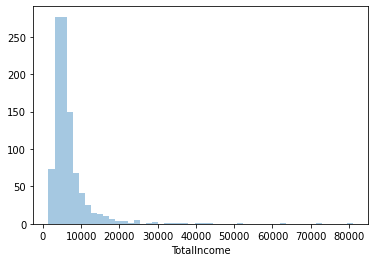

In [46]:
sns.distplot(df.TotalIncome,kde=False)

# **Modeling**:

Encoding to numeric data in order to start the training of the models.

In [67]:
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)

KeyError: ignored

In [48]:
df['Gender'].value_counts()

2.0    799
1.0    182
Name: Gender, dtype: int64

In [49]:
df['Dependents'].value_counts()

3.0    981
Name: Dependents, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Columns: 996 entries, Gender to TotalIncome_log
dtypes: float64(12), int64(3), uint8(981)
memory usage: 1.1 MB


Need to covnvert the object values to numeric ones - `Dependents` needs to become an int.




Heatmaps are very useful to find relations between two variables in a dataset and this way the user gets a visualisation of the numeric data. No correlations are extremely high. Each square shows the correlation between the variables on each axis. 

*   The correlations between the feautures can be explained:


> The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. It is noticable that the correlation between the `ApplicantIncome` and `LoanAmount` is 0.57, which mean that they have a positive correlation, but not strong.



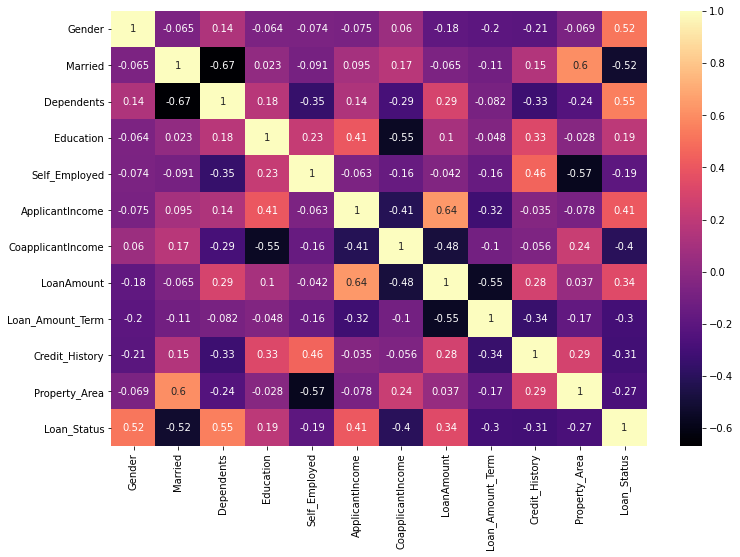

In [58]:
from pandas import DataFrame
%matplotlib inline
plt.figure(figsize=(12, 8))
df_temp = df.copy()
Index= ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
Cols = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
df_temp = DataFrame(abs(np.random.randn(12, 12)), index=Index, columns=Cols)

sns.heatmap(df_temp.corr(), annot=True, cmap = 'magma')
plt.show()

Importing sklearn libraries

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Splitting into train and test set after choosing the right features X and labels y

In [53]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

To split the dataset, I will use random sampling with 80/20 train-test split; that is, 80% of the dataset will be used for training and set aside 20% for testing:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Analyzing the numeric features.


In [55]:
numeric_features = df.select_dtypes(include=[np.number])

In [56]:
numeric_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       ...
       'Loan_ID_LP002979', 'Loan_ID_LP002980', 'Loan_ID_LP002983',
       'Loan_ID_LP002984', 'Loan_ID_LP002986', 'Loan_ID_LP002989',
       'Loan_ID_LP002990', 'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object', length=996)

In [ ]:
# use only those input features with numeric data type 
df = df.select_dtypes(include=["int64","float64"]) 

In [ ]:
# set the target and predictors
y = df.Loan_Status  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["Loan_Status"],axis=1)  # predictors

Three models will be built and evaluated by their performances with R-squared metric. Additionally, insights on the features that are strong predictors of house prices, will be analised .

**Logistic Regression**

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_reg=model.predict(X_test)
evaluation = f1_score(y_test, y_reg)
evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8914956011730205

Reporting the coefficient value for each feature. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

>The importance of a feature is measured by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction.

Feature: 0, Score: -0.03247
Feature: 1, Score: 0.54522
Feature: 2, Score: 0.01215
Feature: 3, Score: 0.36487
Feature: 4, Score: -0.06895
Feature: 5, Score: -0.00001
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00293
Feature: 8, Score: -0.00068
Feature: 9, Score: -1.64869
Feature: 10, Score: -0.49497
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03571
Feature: 13, Score: -0.00764
Feature: 14, Score: -0.00826
Feature: 15, Score: -0.00767
Feature: 16, Score: -0.01091
Feature: 17, Score: -0.00793
Feature: 18, Score: 0.03512
Feature: 19, Score: -0.00726
Feature: 20, Score: -0.00865
Feature: 21, Score: 0.03169
Feature: 22, Score: -0.00820
Feature: 23, Score: -0.00738
Feature: 24, Score: -0.00812
Feature: 25, Score: -0.01044
Feature: 26, Score: 0.03512
Feature: 27, Score: -0.00770
Feature: 28, Score: -0.00916
Feature: 29, Score: -0.00767
Feature: 30, Score: -0.00749
Feature: 31, Score: -0.00807
Feature: 32, Score: 0.03583
Feature: 33, Score: 0.03586
Feature: 34, Score: 0.00000
Feature:

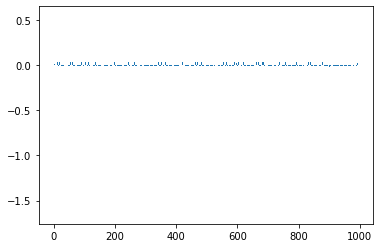

In [60]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

>This might mean that your model is underfit (not enough iteration and it has not used the feature enough) or that the feature is not good and you can try removing it to improve final quality.

**Decision tree:**


1.  Creating classifier
2.  Fitting classifier with train data




In [61]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Do predictions on a test set. **Testing** the model by testing the test data.

In [62]:
y_tree=tree.predict(X_test)
print(y_tree)

[1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 2. 2. 1.]


Evaluate classsifier, measure accuracy, which is 0.76

In [63]:
evaluation = f1_score(y_test, y_tree)
evaluation

0.8950617283950617

 **Random forests**

In [64]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Testing** the model by testing the test data.

In [65]:
y_forest=forest.predict(X_test)
print(y_forest)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


Result of the **accuracy**.

In [66]:
evaluation_f= f1_score(y_test, y_forest)
evaluation_f

0.8825214899713466

# Conclusion
From the Exploratory Data Analysis, it can be concluded:

1. The amount of male applicants seems to be greater than the female ones and they tend to live in the semi suburban areas.
1. There are more positive than negative loan statuses - more approvals.
2. The distributions show that the graduates have more outliers which means that the people with huge income are most likely to be educated.
2. Males have the highest income according to the data. Males that are married have greater income that unmarried male. And the same goes for female. Therefore, there is a greater chance for educated and married people to receive a loan than applicant who are not.

From the Modelling, it can be concluded:

1. After the exploring of different types of modelling, that the more accurate model is Logistic Regression than Decision tree.
2. From the evaluation of the three models, it can be noticed that the Random forest performed better than others


